## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.7ms	remaining: 49.6s
1:	learn: 0.9301086	total: 51.8ms	remaining: 25.8s
2:	learn: 0.9005637	total: 53.6ms	remaining: 17.8s
3:	learn: 0.8720983	total: 55.8ms	remaining: 13.9s
4:	learn: 0.8467410	total: 57.7ms	remaining: 11.5s
5:	learn: 0.8226672	total: 59.5ms	remaining: 9.86s
6:	learn: 0.7994702	total: 61.5ms	remaining: 8.72s
7:	learn: 0.7784272	total: 63.5ms	remaining: 7.87s
8:	learn: 0.7602192	total: 65.6ms	remaining: 7.23s
9:	learn: 0.7412421	total: 67.9ms	remaining: 6.72s
10:	learn: 0.7247930	total: 69.8ms	remaining: 6.28s
11:	learn: 0.7089951	total: 71.7ms	remaining: 5.91s
12:	learn: 0.6951345	total: 73.6ms	remaining: 5.59s
13:	learn: 0.6809276	total: 75.5ms	remaining: 5.31s
14:	learn: 0.6692630	total: 77.4ms	remaining: 5.08s
15:	learn: 0.6588323	total: 79.2ms	remaining: 4.87s
16:	learn: 0.6472700	total: 81.3ms	remaining: 4.7s
17:	learn: 0.6379982	total: 83.2ms	remaining: 4.54s
18:	learn: 0.6294674	total: 85ms	remaining: 4.39s
19:	learn: 0.6193295	tota

60:	learn: 0.4809744	total: 168ms	remaining: 2.59s
61:	learn: 0.4801376	total: 170ms	remaining: 2.57s
62:	learn: 0.4792422	total: 172ms	remaining: 2.56s
63:	learn: 0.4780719	total: 174ms	remaining: 2.54s
64:	learn: 0.4771984	total: 176ms	remaining: 2.53s
65:	learn: 0.4759610	total: 178ms	remaining: 2.52s
66:	learn: 0.4750287	total: 180ms	remaining: 2.5s
67:	learn: 0.4740093	total: 182ms	remaining: 2.49s
68:	learn: 0.4732612	total: 184ms	remaining: 2.48s
69:	learn: 0.4727266	total: 186ms	remaining: 2.46s
70:	learn: 0.4716549	total: 187ms	remaining: 2.45s
71:	learn: 0.4709088	total: 189ms	remaining: 2.44s
72:	learn: 0.4697594	total: 191ms	remaining: 2.43s
73:	learn: 0.4690934	total: 194ms	remaining: 2.42s
74:	learn: 0.4680942	total: 196ms	remaining: 2.41s
75:	learn: 0.4672726	total: 197ms	remaining: 2.4s
76:	learn: 0.4664479	total: 199ms	remaining: 2.39s
77:	learn: 0.4656044	total: 201ms	remaining: 2.38s
78:	learn: 0.4645375	total: 203ms	remaining: 2.37s
79:	learn: 0.4639654	total: 205ms

84:	learn: 0.4596603	total: 216ms	remaining: 2.32s
85:	learn: 0.4587835	total: 218ms	remaining: 2.31s
86:	learn: 0.4583577	total: 220ms	remaining: 2.31s
87:	learn: 0.4577999	total: 222ms	remaining: 2.3s
88:	learn: 0.4572657	total: 224ms	remaining: 2.29s
89:	learn: 0.4569360	total: 226ms	remaining: 2.28s
90:	learn: 0.4559969	total: 228ms	remaining: 2.27s
91:	learn: 0.4549716	total: 230ms	remaining: 2.27s
92:	learn: 0.4544919	total: 232ms	remaining: 2.26s
93:	learn: 0.4537693	total: 234ms	remaining: 2.25s
94:	learn: 0.4532673	total: 236ms	remaining: 2.25s
95:	learn: 0.4526987	total: 238ms	remaining: 2.24s
96:	learn: 0.4520952	total: 240ms	remaining: 2.23s
97:	learn: 0.4513919	total: 242ms	remaining: 2.23s
98:	learn: 0.4503747	total: 244ms	remaining: 2.22s
99:	learn: 0.4494783	total: 246ms	remaining: 2.21s
100:	learn: 0.4487329	total: 248ms	remaining: 2.21s
101:	learn: 0.4481325	total: 250ms	remaining: 2.2s
102:	learn: 0.4475445	total: 252ms	remaining: 2.19s
103:	learn: 0.4466014	total: 2

143:	learn: 0.4277528	total: 334ms	remaining: 1.98s
144:	learn: 0.4274087	total: 336ms	remaining: 1.98s
145:	learn: 0.4271984	total: 338ms	remaining: 1.98s
146:	learn: 0.4268458	total: 340ms	remaining: 1.97s
147:	learn: 0.4264987	total: 342ms	remaining: 1.97s
148:	learn: 0.4262192	total: 344ms	remaining: 1.96s
149:	learn: 0.4257966	total: 346ms	remaining: 1.96s
150:	learn: 0.4253062	total: 348ms	remaining: 1.96s
151:	learn: 0.4247446	total: 350ms	remaining: 1.95s
152:	learn: 0.4237365	total: 352ms	remaining: 1.95s
153:	learn: 0.4233079	total: 354ms	remaining: 1.94s
154:	learn: 0.4228876	total: 356ms	remaining: 1.94s
155:	learn: 0.4225404	total: 358ms	remaining: 1.93s
156:	learn: 0.4222831	total: 360ms	remaining: 1.93s
157:	learn: 0.4218088	total: 362ms	remaining: 1.93s
158:	learn: 0.4213239	total: 364ms	remaining: 1.93s
159:	learn: 0.4210022	total: 366ms	remaining: 1.92s
160:	learn: 0.4201256	total: 368ms	remaining: 1.92s
161:	learn: 0.4197073	total: 370ms	remaining: 1.92s
162:	learn: 

166:	learn: 0.4176884	total: 381ms	remaining: 1.9s
167:	learn: 0.4173026	total: 383ms	remaining: 1.9s
168:	learn: 0.4170486	total: 385ms	remaining: 1.89s
169:	learn: 0.4165960	total: 387ms	remaining: 1.89s
170:	learn: 0.4161870	total: 389ms	remaining: 1.88s
171:	learn: 0.4156228	total: 391ms	remaining: 1.88s
172:	learn: 0.4153041	total: 393ms	remaining: 1.88s
173:	learn: 0.4148857	total: 395ms	remaining: 1.87s
174:	learn: 0.4144190	total: 397ms	remaining: 1.87s
175:	learn: 0.4140875	total: 399ms	remaining: 1.87s
176:	learn: 0.4136755	total: 401ms	remaining: 1.86s
177:	learn: 0.4133860	total: 402ms	remaining: 1.86s
178:	learn: 0.4129780	total: 404ms	remaining: 1.85s
179:	learn: 0.4122907	total: 406ms	remaining: 1.85s
180:	learn: 0.4119188	total: 409ms	remaining: 1.85s
181:	learn: 0.4115412	total: 411ms	remaining: 1.84s
182:	learn: 0.4112620	total: 413ms	remaining: 1.84s
183:	learn: 0.4107734	total: 415ms	remaining: 1.84s
184:	learn: 0.4104881	total: 417ms	remaining: 1.83s
185:	learn: 0.

225:	learn: 0.3971729	total: 498ms	remaining: 1.7s
226:	learn: 0.3968841	total: 500ms	remaining: 1.7s
227:	learn: 0.3965787	total: 502ms	remaining: 1.7s
228:	learn: 0.3963073	total: 504ms	remaining: 1.7s
229:	learn: 0.3960925	total: 506ms	remaining: 1.69s
230:	learn: 0.3957018	total: 508ms	remaining: 1.69s
231:	learn: 0.3954162	total: 510ms	remaining: 1.69s
232:	learn: 0.3951665	total: 512ms	remaining: 1.69s
233:	learn: 0.3949269	total: 514ms	remaining: 1.68s
234:	learn: 0.3945894	total: 516ms	remaining: 1.68s
235:	learn: 0.3944181	total: 518ms	remaining: 1.68s
236:	learn: 0.3941497	total: 520ms	remaining: 1.67s
237:	learn: 0.3939819	total: 522ms	remaining: 1.67s
238:	learn: 0.3938322	total: 524ms	remaining: 1.67s
239:	learn: 0.3935463	total: 526ms	remaining: 1.67s
240:	learn: 0.3933166	total: 528ms	remaining: 1.66s
241:	learn: 0.3930992	total: 530ms	remaining: 1.66s
242:	learn: 0.3928898	total: 532ms	remaining: 1.66s
243:	learn: 0.3926199	total: 534ms	remaining: 1.65s
244:	learn: 0.39

248:	learn: 0.3915186	total: 544ms	remaining: 1.64s
249:	learn: 0.3912759	total: 546ms	remaining: 1.64s
250:	learn: 0.3908375	total: 548ms	remaining: 1.63s
251:	learn: 0.3904815	total: 550ms	remaining: 1.63s
252:	learn: 0.3902127	total: 552ms	remaining: 1.63s
253:	learn: 0.3900274	total: 554ms	remaining: 1.63s
254:	learn: 0.3898171	total: 556ms	remaining: 1.62s
255:	learn: 0.3896180	total: 557ms	remaining: 1.62s
256:	learn: 0.3894251	total: 560ms	remaining: 1.62s
257:	learn: 0.3892139	total: 562ms	remaining: 1.61s
258:	learn: 0.3889352	total: 564ms	remaining: 1.61s
259:	learn: 0.3886531	total: 565ms	remaining: 1.61s
260:	learn: 0.3884539	total: 567ms	remaining: 1.61s
261:	learn: 0.3882459	total: 569ms	remaining: 1.6s
262:	learn: 0.3881101	total: 572ms	remaining: 1.6s
263:	learn: 0.3879324	total: 573ms	remaining: 1.6s
264:	learn: 0.3876861	total: 575ms	remaining: 1.59s
265:	learn: 0.3874255	total: 577ms	remaining: 1.59s
266:	learn: 0.3868515	total: 580ms	remaining: 1.59s
267:	learn: 0.3

306:	learn: 0.3782934	total: 662ms	remaining: 1.49s
307:	learn: 0.3781631	total: 664ms	remaining: 1.49s
308:	learn: 0.3779278	total: 666ms	remaining: 1.49s
309:	learn: 0.3777358	total: 669ms	remaining: 1.49s
310:	learn: 0.3775809	total: 670ms	remaining: 1.49s
311:	learn: 0.3774323	total: 672ms	remaining: 1.48s
312:	learn: 0.3772732	total: 674ms	remaining: 1.48s
313:	learn: 0.3771184	total: 676ms	remaining: 1.48s
314:	learn: 0.3769370	total: 678ms	remaining: 1.48s
315:	learn: 0.3766643	total: 680ms	remaining: 1.47s
316:	learn: 0.3764891	total: 682ms	remaining: 1.47s
317:	learn: 0.3762751	total: 684ms	remaining: 1.47s
318:	learn: 0.3761284	total: 686ms	remaining: 1.46s
319:	learn: 0.3760168	total: 688ms	remaining: 1.46s
320:	learn: 0.3757763	total: 691ms	remaining: 1.46s
321:	learn: 0.3756076	total: 693ms	remaining: 1.46s
322:	learn: 0.3754123	total: 696ms	remaining: 1.46s
323:	learn: 0.3751852	total: 698ms	remaining: 1.46s
324:	learn: 0.3750004	total: 700ms	remaining: 1.45s
325:	learn: 

328:	learn: 0.3743710	total: 708ms	remaining: 1.44s
329:	learn: 0.3741679	total: 710ms	remaining: 1.44s
330:	learn: 0.3738646	total: 712ms	remaining: 1.44s
331:	learn: 0.3736647	total: 714ms	remaining: 1.44s
332:	learn: 0.3733429	total: 716ms	remaining: 1.43s
333:	learn: 0.3732059	total: 718ms	remaining: 1.43s
334:	learn: 0.3730574	total: 720ms	remaining: 1.43s
335:	learn: 0.3728663	total: 722ms	remaining: 1.43s
336:	learn: 0.3727111	total: 724ms	remaining: 1.42s
337:	learn: 0.3724765	total: 726ms	remaining: 1.42s
338:	learn: 0.3722959	total: 728ms	remaining: 1.42s
339:	learn: 0.3720213	total: 730ms	remaining: 1.42s
340:	learn: 0.3718316	total: 732ms	remaining: 1.42s
341:	learn: 0.3716519	total: 735ms	remaining: 1.41s
342:	learn: 0.3714592	total: 737ms	remaining: 1.41s
343:	learn: 0.3713389	total: 739ms	remaining: 1.41s
344:	learn: 0.3711642	total: 740ms	remaining: 1.41s
345:	learn: 0.3709569	total: 742ms	remaining: 1.4s
346:	learn: 0.3708184	total: 744ms	remaining: 1.4s
347:	learn: 0.

388:	learn: 0.3640529	total: 827ms	remaining: 1.3s
389:	learn: 0.3639296	total: 829ms	remaining: 1.3s
390:	learn: 0.3637044	total: 831ms	remaining: 1.29s
391:	learn: 0.3636336	total: 833ms	remaining: 1.29s
392:	learn: 0.3635003	total: 835ms	remaining: 1.29s
393:	learn: 0.3633029	total: 837ms	remaining: 1.29s
394:	learn: 0.3632136	total: 839ms	remaining: 1.28s
395:	learn: 0.3629529	total: 841ms	remaining: 1.28s
396:	learn: 0.3627743	total: 843ms	remaining: 1.28s
397:	learn: 0.3626747	total: 845ms	remaining: 1.28s
398:	learn: 0.3625881	total: 847ms	remaining: 1.27s
399:	learn: 0.3622963	total: 849ms	remaining: 1.27s
400:	learn: 0.3622314	total: 851ms	remaining: 1.27s
401:	learn: 0.3620143	total: 853ms	remaining: 1.27s
402:	learn: 0.3618403	total: 855ms	remaining: 1.26s
403:	learn: 0.3616747	total: 857ms	remaining: 1.26s
404:	learn: 0.3614255	total: 859ms	remaining: 1.26s
405:	learn: 0.3613607	total: 861ms	remaining: 1.26s
406:	learn: 0.3612875	total: 862ms	remaining: 1.26s
407:	learn: 0.

411:	learn: 0.3603038	total: 873ms	remaining: 1.25s
412:	learn: 0.3602055	total: 875ms	remaining: 1.24s
413:	learn: 0.3599094	total: 877ms	remaining: 1.24s
414:	learn: 0.3597887	total: 879ms	remaining: 1.24s
415:	learn: 0.3595791	total: 881ms	remaining: 1.24s
416:	learn: 0.3594487	total: 883ms	remaining: 1.23s
417:	learn: 0.3592759	total: 885ms	remaining: 1.23s
418:	learn: 0.3591088	total: 887ms	remaining: 1.23s
419:	learn: 0.3589470	total: 888ms	remaining: 1.23s
420:	learn: 0.3587972	total: 890ms	remaining: 1.22s
421:	learn: 0.3586831	total: 892ms	remaining: 1.22s
422:	learn: 0.3585620	total: 894ms	remaining: 1.22s
423:	learn: 0.3584427	total: 896ms	remaining: 1.22s
424:	learn: 0.3583044	total: 898ms	remaining: 1.22s
425:	learn: 0.3581698	total: 900ms	remaining: 1.21s
426:	learn: 0.3580461	total: 902ms	remaining: 1.21s
427:	learn: 0.3579182	total: 904ms	remaining: 1.21s
428:	learn: 0.3577521	total: 906ms	remaining: 1.21s
429:	learn: 0.3576138	total: 908ms	remaining: 1.2s
430:	learn: 0

472:	learn: 0.3516593	total: 992ms	remaining: 1.1s
473:	learn: 0.3514906	total: 994ms	remaining: 1.1s
474:	learn: 0.3513843	total: 996ms	remaining: 1.1s
475:	learn: 0.3512406	total: 998ms	remaining: 1.1s
476:	learn: 0.3510044	total: 1s	remaining: 1.1s
477:	learn: 0.3509121	total: 1s	remaining: 1.09s
478:	learn: 0.3507270	total: 1s	remaining: 1.09s
479:	learn: 0.3506003	total: 1.01s	remaining: 1.09s
480:	learn: 0.3505111	total: 1.01s	remaining: 1.09s
481:	learn: 0.3503906	total: 1.01s	remaining: 1.08s
482:	learn: 0.3501522	total: 1.01s	remaining: 1.08s
483:	learn: 0.3500494	total: 1.01s	remaining: 1.08s
484:	learn: 0.3498921	total: 1.01s	remaining: 1.08s
485:	learn: 0.3497143	total: 1.02s	remaining: 1.08s
486:	learn: 0.3496172	total: 1.02s	remaining: 1.07s
487:	learn: 0.3494609	total: 1.02s	remaining: 1.07s
488:	learn: 0.3493200	total: 1.02s	remaining: 1.07s
489:	learn: 0.3491550	total: 1.02s	remaining: 1.07s
490:	learn: 0.3490323	total: 1.03s	remaining: 1.06s
491:	learn: 0.3488767	tota

495:	learn: 0.3484072	total: 1.04s	remaining: 1.05s
496:	learn: 0.3482698	total: 1.04s	remaining: 1.05s
497:	learn: 0.3481630	total: 1.04s	remaining: 1.05s
498:	learn: 0.3480855	total: 1.04s	remaining: 1.05s
499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.05s	remaining: 1.04s
501:	learn: 0.3476142	total: 1.05s	remaining: 1.04s
502:	learn: 0.3474667	total: 1.05s	remaining: 1.04s
503:	learn: 0.3473844	total: 1.05s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.05s	remaining: 1.03s
505:	learn: 0.3471124	total: 1.06s	remaining: 1.03s
506:	learn: 0.3469987	total: 1.06s	remaining: 1.03s
507:	learn: 0.3469000	total: 1.06s	remaining: 1.03s
508:	learn: 0.3467621	total: 1.06s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.06s	remaining: 1.02s
510:	learn: 0.3465795	total: 1.07s	remaining: 1.02s
511:	learn: 0.3464899	total: 1.07s	remaining: 1.02s
512:	learn: 0.3463711	total: 1.07s	remaining: 1.02s
513:	learn: 0.3462483	total: 1.07s	remaining: 1.01s
514:	learn: 

556:	learn: 0.3407365	total: 1.16s	remaining: 923ms
557:	learn: 0.3406506	total: 1.16s	remaining: 921ms
558:	learn: 0.3405352	total: 1.16s	remaining: 919ms
559:	learn: 0.3404352	total: 1.17s	remaining: 917ms
560:	learn: 0.3403419	total: 1.17s	remaining: 914ms
561:	learn: 0.3402836	total: 1.17s	remaining: 912ms
562:	learn: 0.3402264	total: 1.17s	remaining: 910ms
563:	learn: 0.3400466	total: 1.17s	remaining: 908ms
564:	learn: 0.3399235	total: 1.18s	remaining: 905ms
565:	learn: 0.3398064	total: 1.18s	remaining: 903ms
566:	learn: 0.3396466	total: 1.18s	remaining: 901ms
567:	learn: 0.3395531	total: 1.18s	remaining: 899ms
568:	learn: 0.3394093	total: 1.18s	remaining: 897ms
569:	learn: 0.3393241	total: 1.19s	remaining: 895ms
570:	learn: 0.3392368	total: 1.19s	remaining: 893ms
571:	learn: 0.3391373	total: 1.19s	remaining: 891ms
572:	learn: 0.3390261	total: 1.19s	remaining: 888ms
573:	learn: 0.3389126	total: 1.19s	remaining: 886ms
574:	learn: 0.3388268	total: 1.2s	remaining: 884ms
575:	learn: 0

578:	learn: 0.3384814	total: 1.2s	remaining: 876ms
579:	learn: 0.3383559	total: 1.21s	remaining: 874ms
580:	learn: 0.3382469	total: 1.21s	remaining: 872ms
581:	learn: 0.3381645	total: 1.21s	remaining: 870ms
582:	learn: 0.3380538	total: 1.21s	remaining: 868ms
583:	learn: 0.3379690	total: 1.22s	remaining: 866ms
584:	learn: 0.3378924	total: 1.22s	remaining: 863ms
585:	learn: 0.3378307	total: 1.22s	remaining: 861ms
586:	learn: 0.3377186	total: 1.22s	remaining: 859ms
587:	learn: 0.3376434	total: 1.22s	remaining: 857ms
588:	learn: 0.3375696	total: 1.22s	remaining: 855ms
589:	learn: 0.3374902	total: 1.23s	remaining: 853ms
590:	learn: 0.3373056	total: 1.23s	remaining: 850ms
591:	learn: 0.3371913	total: 1.23s	remaining: 848ms
592:	learn: 0.3371272	total: 1.23s	remaining: 846ms
593:	learn: 0.3370368	total: 1.23s	remaining: 844ms
594:	learn: 0.3368150	total: 1.24s	remaining: 842ms
595:	learn: 0.3367491	total: 1.24s	remaining: 840ms
596:	learn: 0.3366496	total: 1.24s	remaining: 837ms
597:	learn: 0

639:	learn: 0.3323174	total: 1.32s	remaining: 745ms
640:	learn: 0.3322206	total: 1.33s	remaining: 743ms
641:	learn: 0.3321031	total: 1.33s	remaining: 741ms
642:	learn: 0.3319978	total: 1.33s	remaining: 739ms
643:	learn: 0.3319044	total: 1.33s	remaining: 737ms
644:	learn: 0.3318169	total: 1.33s	remaining: 735ms
645:	learn: 0.3316585	total: 1.34s	remaining: 733ms
646:	learn: 0.3316256	total: 1.34s	remaining: 730ms
647:	learn: 0.3315220	total: 1.34s	remaining: 728ms
648:	learn: 0.3313829	total: 1.34s	remaining: 727ms
649:	learn: 0.3313125	total: 1.34s	remaining: 724ms
650:	learn: 0.3311735	total: 1.35s	remaining: 722ms
651:	learn: 0.3310386	total: 1.35s	remaining: 720ms
652:	learn: 0.3309129	total: 1.35s	remaining: 718ms
653:	learn: 0.3308321	total: 1.35s	remaining: 716ms
654:	learn: 0.3307342	total: 1.35s	remaining: 714ms
655:	learn: 0.3306809	total: 1.36s	remaining: 712ms
656:	learn: 0.3305729	total: 1.36s	remaining: 710ms
657:	learn: 0.3304900	total: 1.36s	remaining: 707ms
658:	learn: 

662:	learn: 0.3299184	total: 1.37s	remaining: 697ms
663:	learn: 0.3298189	total: 1.37s	remaining: 695ms
664:	learn: 0.3296970	total: 1.38s	remaining: 693ms
665:	learn: 0.3296671	total: 1.38s	remaining: 691ms
666:	learn: 0.3295999	total: 1.38s	remaining: 689ms
667:	learn: 0.3295390	total: 1.38s	remaining: 687ms
668:	learn: 0.3294195	total: 1.38s	remaining: 685ms
669:	learn: 0.3293185	total: 1.39s	remaining: 683ms
670:	learn: 0.3292086	total: 1.39s	remaining: 681ms
671:	learn: 0.3289913	total: 1.39s	remaining: 679ms
672:	learn: 0.3288859	total: 1.39s	remaining: 676ms
673:	learn: 0.3288145	total: 1.39s	remaining: 674ms
674:	learn: 0.3286969	total: 1.4s	remaining: 672ms
675:	learn: 0.3286108	total: 1.4s	remaining: 670ms
676:	learn: 0.3285218	total: 1.4s	remaining: 668ms
677:	learn: 0.3284620	total: 1.4s	remaining: 666ms
678:	learn: 0.3283999	total: 1.4s	remaining: 663ms
679:	learn: 0.3283506	total: 1.41s	remaining: 661ms
680:	learn: 0.3282208	total: 1.41s	remaining: 659ms
681:	learn: 0.328

721:	learn: 0.3245270	total: 1.49s	remaining: 574ms
722:	learn: 0.3244558	total: 1.49s	remaining: 572ms
723:	learn: 0.3243835	total: 1.5s	remaining: 570ms
724:	learn: 0.3242957	total: 1.5s	remaining: 568ms
725:	learn: 0.3242628	total: 1.5s	remaining: 566ms
726:	learn: 0.3242076	total: 1.5s	remaining: 564ms
727:	learn: 0.3240923	total: 1.5s	remaining: 562ms
728:	learn: 0.3240148	total: 1.5s	remaining: 560ms
729:	learn: 0.3239014	total: 1.51s	remaining: 558ms
730:	learn: 0.3237918	total: 1.51s	remaining: 556ms
731:	learn: 0.3236654	total: 1.51s	remaining: 553ms
732:	learn: 0.3235938	total: 1.51s	remaining: 551ms
733:	learn: 0.3235120	total: 1.51s	remaining: 549ms
734:	learn: 0.3234421	total: 1.52s	remaining: 547ms
735:	learn: 0.3233367	total: 1.52s	remaining: 545ms
736:	learn: 0.3232438	total: 1.52s	remaining: 543ms
737:	learn: 0.3231289	total: 1.52s	remaining: 541ms
738:	learn: 0.3230697	total: 1.53s	remaining: 539ms
739:	learn: 0.3229734	total: 1.53s	remaining: 537ms
740:	learn: 0.3228

743:	learn: 0.3225924	total: 1.54s	remaining: 529ms
744:	learn: 0.3225096	total: 1.54s	remaining: 527ms
745:	learn: 0.3224088	total: 1.54s	remaining: 525ms
746:	learn: 0.3223202	total: 1.54s	remaining: 522ms
747:	learn: 0.3222404	total: 1.54s	remaining: 520ms
748:	learn: 0.3221810	total: 1.55s	remaining: 518ms
749:	learn: 0.3221342	total: 1.55s	remaining: 516ms
750:	learn: 0.3220746	total: 1.55s	remaining: 514ms
751:	learn: 0.3219897	total: 1.55s	remaining: 512ms
752:	learn: 0.3218990	total: 1.55s	remaining: 510ms
753:	learn: 0.3218179	total: 1.55s	remaining: 507ms
754:	learn: 0.3217323	total: 1.56s	remaining: 505ms
755:	learn: 0.3216617	total: 1.56s	remaining: 503ms
756:	learn: 0.3216090	total: 1.56s	remaining: 501ms
757:	learn: 0.3215306	total: 1.56s	remaining: 499ms
758:	learn: 0.3214274	total: 1.57s	remaining: 497ms
759:	learn: 0.3212014	total: 1.57s	remaining: 495ms
760:	learn: 0.3211190	total: 1.57s	remaining: 493ms
761:	learn: 0.3210312	total: 1.57s	remaining: 491ms
762:	learn: 

801:	learn: 0.3176217	total: 1.65s	remaining: 408ms
802:	learn: 0.3174842	total: 1.66s	remaining: 406ms
803:	learn: 0.3173800	total: 1.66s	remaining: 404ms
804:	learn: 0.3172892	total: 1.66s	remaining: 402ms
805:	learn: 0.3172199	total: 1.66s	remaining: 400ms
806:	learn: 0.3171379	total: 1.66s	remaining: 398ms
807:	learn: 0.3170699	total: 1.67s	remaining: 396ms
808:	learn: 0.3170027	total: 1.67s	remaining: 394ms
809:	learn: 0.3169244	total: 1.67s	remaining: 391ms
810:	learn: 0.3168075	total: 1.67s	remaining: 389ms
811:	learn: 0.3167047	total: 1.67s	remaining: 387ms
812:	learn: 0.3166132	total: 1.67s	remaining: 385ms
813:	learn: 0.3165391	total: 1.68s	remaining: 383ms
814:	learn: 0.3164726	total: 1.68s	remaining: 381ms
815:	learn: 0.3164087	total: 1.68s	remaining: 379ms
816:	learn: 0.3163590	total: 1.68s	remaining: 377ms
817:	learn: 0.3162644	total: 1.68s	remaining: 375ms
818:	learn: 0.3161739	total: 1.69s	remaining: 373ms
819:	learn: 0.3160986	total: 1.69s	remaining: 371ms
820:	learn: 

824:	learn: 0.3156673	total: 1.7s	remaining: 360ms
825:	learn: 0.3156288	total: 1.7s	remaining: 358ms
826:	learn: 0.3155257	total: 1.7s	remaining: 356ms
827:	learn: 0.3154546	total: 1.71s	remaining: 354ms
828:	learn: 0.3153664	total: 1.71s	remaining: 352ms
829:	learn: 0.3152896	total: 1.71s	remaining: 350ms
830:	learn: 0.3152050	total: 1.71s	remaining: 348ms
831:	learn: 0.3151385	total: 1.71s	remaining: 346ms
832:	learn: 0.3150922	total: 1.72s	remaining: 344ms
833:	learn: 0.3149588	total: 1.72s	remaining: 342ms
834:	learn: 0.3149074	total: 1.72s	remaining: 340ms
835:	learn: 0.3148291	total: 1.72s	remaining: 338ms
836:	learn: 0.3147707	total: 1.72s	remaining: 336ms
837:	learn: 0.3147022	total: 1.73s	remaining: 334ms
838:	learn: 0.3145737	total: 1.73s	remaining: 331ms
839:	learn: 0.3144908	total: 1.73s	remaining: 329ms
840:	learn: 0.3144038	total: 1.73s	remaining: 327ms
841:	learn: 0.3143434	total: 1.73s	remaining: 325ms
842:	learn: 0.3142662	total: 1.74s	remaining: 323ms
843:	learn: 0.3

885:	learn: 0.3110486	total: 1.82s	remaining: 234ms
886:	learn: 0.3109334	total: 1.82s	remaining: 232ms
887:	learn: 0.3108347	total: 1.82s	remaining: 230ms
888:	learn: 0.3107647	total: 1.82s	remaining: 228ms
889:	learn: 0.3107302	total: 1.83s	remaining: 226ms
890:	learn: 0.3106509	total: 1.83s	remaining: 224ms
891:	learn: 0.3106139	total: 1.83s	remaining: 222ms
892:	learn: 0.3105421	total: 1.83s	remaining: 220ms
893:	learn: 0.3104659	total: 1.83s	remaining: 218ms
894:	learn: 0.3104028	total: 1.84s	remaining: 216ms
895:	learn: 0.3103186	total: 1.84s	remaining: 213ms
896:	learn: 0.3102488	total: 1.84s	remaining: 211ms
897:	learn: 0.3101565	total: 1.84s	remaining: 209ms
898:	learn: 0.3100955	total: 1.84s	remaining: 207ms
899:	learn: 0.3100512	total: 1.85s	remaining: 205ms
900:	learn: 0.3100138	total: 1.85s	remaining: 203ms
901:	learn: 0.3099635	total: 1.85s	remaining: 201ms
902:	learn: 0.3098989	total: 1.85s	remaining: 199ms
903:	learn: 0.3098084	total: 1.85s	remaining: 197ms
904:	learn: 

908:	learn: 0.3094688	total: 1.86s	remaining: 187ms
909:	learn: 0.3093784	total: 1.87s	remaining: 185ms
910:	learn: 0.3093058	total: 1.87s	remaining: 183ms
911:	learn: 0.3092574	total: 1.87s	remaining: 180ms
912:	learn: 0.3092023	total: 1.87s	remaining: 178ms
913:	learn: 0.3091306	total: 1.87s	remaining: 176ms
914:	learn: 0.3090719	total: 1.88s	remaining: 174ms
915:	learn: 0.3090199	total: 1.88s	remaining: 172ms
916:	learn: 0.3089417	total: 1.88s	remaining: 170ms
917:	learn: 0.3088562	total: 1.88s	remaining: 168ms
918:	learn: 0.3087578	total: 1.88s	remaining: 166ms
919:	learn: 0.3086793	total: 1.89s	remaining: 164ms
920:	learn: 0.3086255	total: 1.89s	remaining: 162ms
921:	learn: 0.3085073	total: 1.89s	remaining: 160ms
922:	learn: 0.3084388	total: 1.89s	remaining: 158ms
923:	learn: 0.3083752	total: 1.89s	remaining: 156ms
924:	learn: 0.3082889	total: 1.9s	remaining: 154ms
925:	learn: 0.3081901	total: 1.9s	remaining: 152ms
926:	learn: 0.3081106	total: 1.9s	remaining: 150ms
927:	learn: 0.3

969:	learn: 0.3049028	total: 1.99s	remaining: 61.4ms
970:	learn: 0.3048446	total: 1.99s	remaining: 59.3ms
971:	learn: 0.3047712	total: 1.99s	remaining: 57.3ms
972:	learn: 0.3047313	total: 1.99s	remaining: 55.2ms
973:	learn: 0.3046600	total: 1.99s	remaining: 53.2ms
974:	learn: 0.3045983	total: 1.99s	remaining: 51.1ms
975:	learn: 0.3044944	total: 2s	remaining: 49.1ms
976:	learn: 0.3044431	total: 2s	remaining: 47.1ms
977:	learn: 0.3043959	total: 2s	remaining: 45ms
978:	learn: 0.3043249	total: 2s	remaining: 43ms
979:	learn: 0.3042644	total: 2s	remaining: 40.9ms
980:	learn: 0.3042142	total: 2.01s	remaining: 38.9ms
981:	learn: 0.3041509	total: 2.01s	remaining: 36.8ms
982:	learn: 0.3041077	total: 2.01s	remaining: 34.8ms
983:	learn: 0.3040665	total: 2.01s	remaining: 32.7ms
984:	learn: 0.3040237	total: 2.01s	remaining: 30.7ms
985:	learn: 0.3039532	total: 2.02s	remaining: 28.6ms
986:	learn: 0.3038723	total: 2.02s	remaining: 26.6ms
987:	learn: 0.3038141	total: 2.02s	remaining: 24.5ms
988:	learn: 

992:	learn: 0.3035124	total: 2.03s	remaining: 14.3ms
993:	learn: 0.3034295	total: 2.03s	remaining: 12.3ms
994:	learn: 0.3033612	total: 2.03s	remaining: 10.2ms
995:	learn: 0.3033209	total: 2.04s	remaining: 8.18ms
996:	learn: 0.3032659	total: 2.04s	remaining: 6.13ms
997:	learn: 0.3032189	total: 2.04s	remaining: 4.09ms
998:	learn: 0.3031594	total: 2.04s	remaining: 2.04ms
999:	learn: 0.3030916	total: 2.04s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08242446613132061


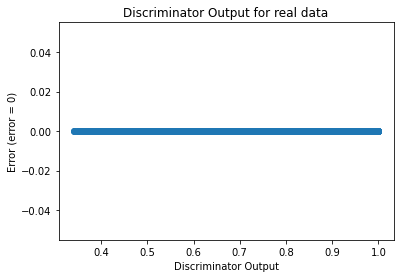

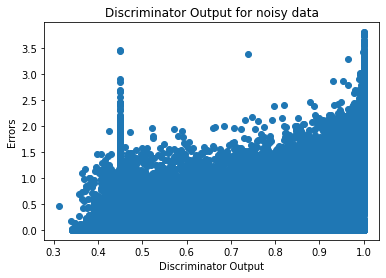

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0109]], device='cuda:0', requires_grad=True)
